In [1]:
#20BCE1858 S.V.NAVYA KALA- K MEANS WITHOUT USING IN-BUILT FUNCTIONS
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import math
m1 = pd.read_csv("train.csv")
m2 = pd.read_csv("test.csv")
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(m1)

In [4]:
clusters, centroids = kmeans(X, k=5)

In [5]:
ssd = 0
for i, cluster in enumerate(clusters):
    distances = np.sqrt(np.sum((cluster - centroids[i])**2, axis=1))
    ssd += np.sum(distances**2)
print('Sum of squared distances:', ssd)

Sum of squared distances: 1169380.856574168


In [24]:
def kmeans(X, k, max_iters=100):
    # Randomly initialize the centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False), :]

    for i in range(max_iters):
        # Assign each data point to the nearest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        # Update the centroids to the mean of the assigned data points
        for j in range(k):
            centroids[j, :] = X[labels == j, :].mean(axis=0)

    return labels, centroids

In [27]:
# Run k-means clustering on the dataset with k=2
labels, centroids = kmeans(X, k=5)

SSE: 448698.7142118303


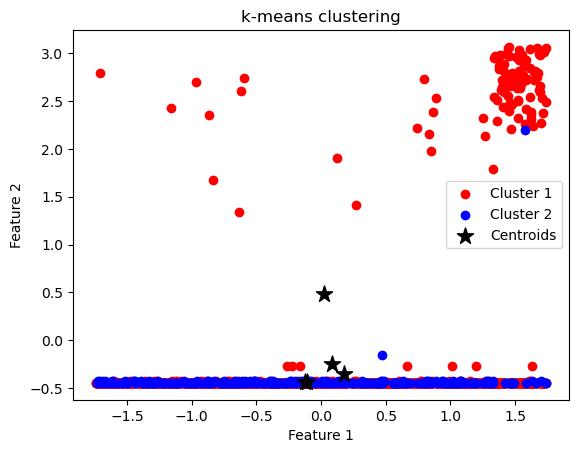

In [33]:
# Calculate the SSE
sse = 0
for i in range(2):
    sse += np.sum((X[labels == i, :] - centroids[i, :])**2)

# Print the SSE
print("SSE:", sse)

# Plot the data points with different colors for each cluster
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], color='red', label='Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], color='blue', label='Cluster 2')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='*', s=150, label='Centroids')

plt.title('k-means clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

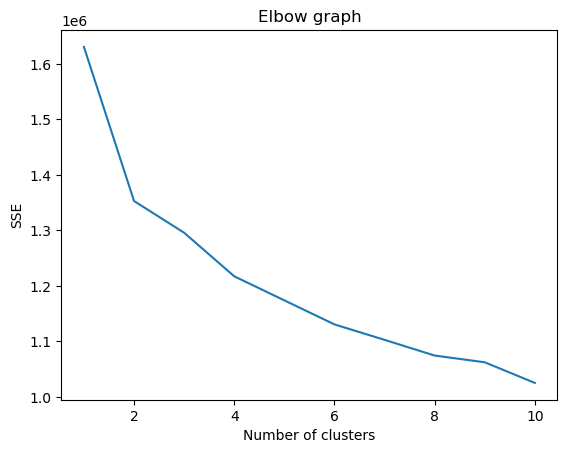

In [34]:
# Plot the elbow graph to determine the optimal value of k
sse_values = []
for k in range(1, 11):
    labels, centroids = kmeans(X, k=k)
    sse = 0
    for i in range(k):
        sse += np.sum((X[labels == i, :] - centroids[i, :])**2)
    sse_values.append(sse)

plt.plot(range(1, 11), sse_values)
plt.title('Elbow graph')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()